# Machine Learning

## Assignment 2: Supervised Classification

by:


Sergio Eduardo Vega Guzmán A01194108

Gustavo De Los Ríos Alatorre A01410922




### Part 1: Reading the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm  

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data"

column_names = ["temperature", "nausea", "lumbar_pain", "urine_pushing", "micturition_pains", "burning_of_urethra", "Inflammation_of_urinary_bladder", "Nephritis_of_renal_pelvis_origin"]
df = pd.read_csv(url, header=None, names=column_names, delimiter='	', encoding="utf-16", decimal=',')

In [3]:
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,Inflammation_of_urinary_bladder,Nephritis_of_renal_pelvis_origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [4]:
df = df.replace("no", 0)
df = df.replace("yes", 1)

In [5]:
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,Inflammation_of_urinary_bladder,Nephritis_of_renal_pelvis_origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [6]:
df.loc[df['Inflammation_of_urinary_bladder'] == 1, 'disease'] = 1
df.loc[df['Nephritis_of_renal_pelvis_origin'] == 1, 'disease'] = 2
df.loc[(df['Inflammation_of_urinary_bladder'] == 1) & (df['Nephritis_of_renal_pelvis_origin'] == 1), 'disease'] = 3

In [7]:
df = df.fillna(0)
df['disease'] = df['disease'].astype(int)

In [8]:
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,Inflammation_of_urinary_bladder,Nephritis_of_renal_pelvis_origin,disease
0,35.5,0,1,0,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0,1
4,36.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1,2
116,41.5,0,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1,2
118,41.5,0,1,1,0,1,0,1,2


In [9]:
target = df['disease']
values_and_counts =  np.unique(target, return_counts=True)

In [10]:
print(values_and_counts)

(array([0, 1, 2, 3]), array([30, 40, 31, 19], dtype=int64))


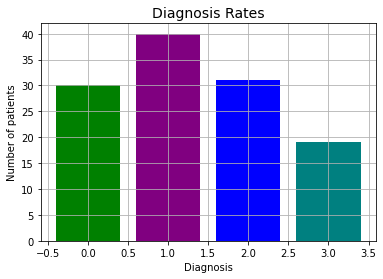

In [11]:
colors = ['green', 'purple', 'blue', 'teal']
plt.bar(values_and_counts[0], values_and_counts[1], color = colors)
plt.title('Diagnosis Rates', fontsize = 14)
plt.xlabel('Diagnosis')
plt.ylabel('Number of patients')
plt.grid(True)
plt.show()

In [14]:
df = df.drop(['Inflammation_of_urinary_bladder', 'Nephritis_of_renal_pelvis_origin', 'disease'], axis=1)
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


### Part 2: Train-test split

In [15]:
from sklearn.model_selection import train_test_split

X = df.values
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part 3: Decision Tree

In [16]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.4, 0.9, 'x[2] <= 0.5\ngini = 0.738\nsamples = 96\nvalue = [24, 31, 25, 16]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.326\nsamples = 39\nvalue = [8, 31, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0, 0]'),
 Text(0.6, 0.7, 'x[0] <= 37.95\ngini = 0.65\nsamples = 57\nvalue = [16, 0, 25, 16]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.476\nsamples = 41\nvalue = [0, 0, 25, 16]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.461\nsamples = 25\nvalue = [0, 0, 9, 16]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16]')]

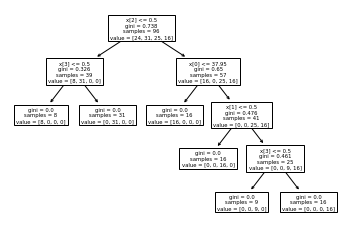

In [17]:
tree.plot_tree(dt)

In [26]:
# Use the trained model to make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
tree_accuracy = accuracy_score(y_test, y_pred)
tree_f1_score = f1_score(y_test, y_pred, average="weighted")
tree_precision_score = precision_score(y_test,y_pred, average="weighted")
tree_recall_score = recall_score(y_test, y_pred, average="weighted")

In [28]:
print("Accuracy: {}".format(tree_accuracy))
print("F1 Score: {}".format(tree_f1_score))
print("Precision: {}".format(tree_precision_score))
print("Recall: {}".format(tree_recall_score))

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


### Part 4: KNN

In [32]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

In [33]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average="weighted")
knn_precision_score = precision_score(y_test,y_pred, average="weighted")
knn_recall_score = recall_score(y_test, y_pred, average="weighted")

In [34]:
print("Accuracy: {}".format(tree_accuracy))
print("F1 Score: {}".format(tree_f1_score))
print("Precision: {}".format(tree_precision_score))
print("Recall: {}".format(tree_recall_score))

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


### Part 5: SVM

In [36]:
# Create a SVM classifier
svm_clf = svm.SVC()

# Train the model using training sets
svm_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = svm_clf.predict(X_test)

In [37]:
linear = svm.SVC(kernel = 'linear', C = 1,
                 decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1,
              decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1,
               decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, 
decision_function_shape='ovo').fit(X_train, y_train)

In [38]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [39]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 1.0
Accuracy Polynomial Kernel: 0.5
Accuracy Radial Basis Kernel: 1.0
Accuracy Sigmoid Kernel: 0.375
